In [44]:
from process_data import PreProcessData, PostProcessData
from model import Forecast, FitPredict, Evaluation
import pandas as pd

In [45]:
train = PreProcessData.train

In [46]:
train_processor = PreProcessData(train)
post_process = PostProcessData()
fit_predict = FitPredict()
evaluator = Evaluation()

In [47]:
post_process.verify_index(train_processor.clean_dic)

Number of dataframes with uncomplete index:  0


In [48]:
example_df = train_processor.clean_dic['Canada',
  'Discount Stickers',
  'Kaggle']

In [49]:
example_train, example_test = post_process.train_test_split(example_df, 562)

Train dates : 2010-01-01 00:00:00 --- 2015-06-18 00:00:00  (n=1995)
Test dates  : 2015-06-19 00:00:00 --- 2016-12-31 00:00:00  (n=562)


In [50]:
forecast = Forecast()

In [51]:
forecaster = forecast.create_lgbm_regressor_forecaster(example_train, 'num_sold', 562)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 1989, number of used features: 6
[LightGBM] [Info] Start training from score 736.278532


(188.02107072219601, 0.2756900659370705)

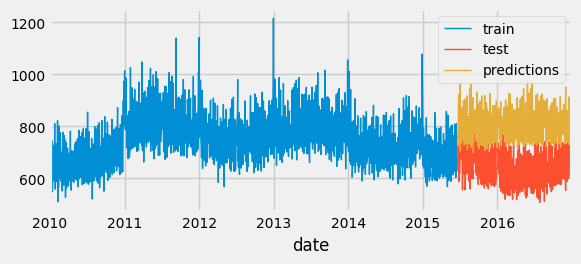

In [52]:
fit_predict.fit_forecaster(forecaster, example_train, 'num_sold')
predictions = fit_predict.get_predictions(forecaster, 562)
evaluator.plot_predictions_versus_test_data(example_train, example_test, 'num_sold', predictions)
evaluator.test_error(example_test, 'num_sold', predictions)

In [39]:
forecast.hyperparameter_grid_earch(forecaster, example_train, 'num_sold', 562)

lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 992, number of used features: 5
[LightGBM] [Info] Start training from score 734.858871
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 992, number of used features: 5
[LightGBM] [Info] Start training from score 734.858871
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 992, number of used features: 5
[LightGBM] [Info] Start training

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 2281, number of used features: 20
[LightGBM] [Info] Start training from score 725.605436


(54.60735260795953, 0.05703175517168267)

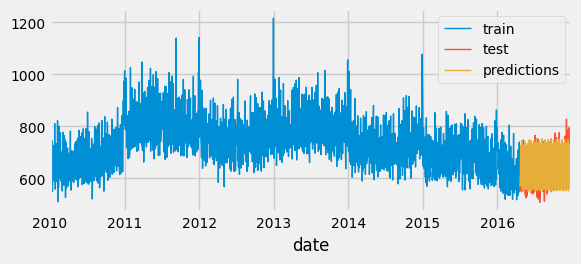

In [ ]:
fit_predict.fit_forecaster(forecaster, example_train, 'num_sold')
predictions = fit_predict.get_predictions(forecaster, 562)
evaluator.plot_predictions_versus_test_data(example_train, example_test, 'num_sold', predictions)
evaluator.test_error(example_test, 'num_sold', predictions)

(189.71949457852682, 0.28317855487627214)

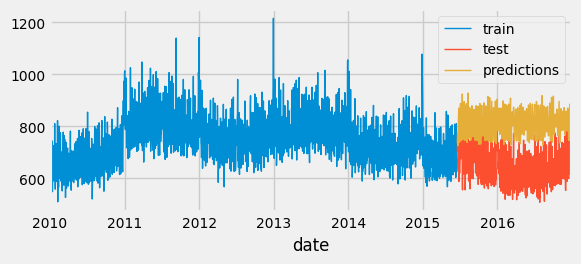

In [ ]:
forecaster = forecast.create_random_forest_regresor_forecaster(example_train, 'num_sold', 562)
fit_predict.fit_forecaster(forecaster, example_train, 'num_sold')
predictions = fit_predict.get_predictions(forecaster, 562)
evaluator.plot_predictions_versus_test_data(example_train, example_test, 'num_sold', predictions)
evaluator.test_error(example_test, 'num_sold', predictions)

la funcion hiperparametros no sirve

(81.05878826583614, 0.11504183517396924)

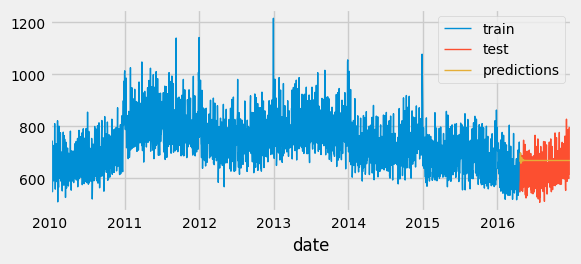

In [ ]:
forecaster = forecast.create_svr_regresor_forecaster(example_train, 'num_sold', 562)
fit_predict.fit_forecaster(forecaster, example_train, 'num_sold')
predictions = fit_predict.get_predictions(forecaster, 562)
evaluator.plot_predictions_versus_test_data(example_train, example_test, 'num_sold', predictions)
evaluator.test_error(example_test, 'num_sold', predictions)

la funcion hiperparametros no sirve

In [31]:
forecaster = forecast.create_sarimax_forecaster(example_train, 'num_sold', 562)
fit_predict.fit_forecaster(forecaster, example_train, 'num_sold')
predictions = fit_predict.get_predictions(forecaster, 562)
evaluator.plot_predictions_versus_test_data(example_train, example_test, 'num_sold', predictions)
evaluator.test_error(example_test, 'num_sold', predictions)

TypeError: ForecasterSarimax.__init__() got an unexpected keyword argument 'kernel'

la funcion de creación del forecaster no sirve